In [1]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import shutil
import os
import time
from PIL import Image

In [48]:
# Set the paths for the data and the ground truth files
train_dir = "D:/msc/data/ISIC-2017_Training_Data"
train_truth = "D:/msc/data/ISIC-2017_Training_Part3_GroundTruth.csv"

test_dir = "D:/msc/data/ISIC-2017_Test_v2_Data"
test_truth = "D:/msc/data/ISIC-2017_Test_v2_Part3_GroundTruth.csv"

val_dir = "D:/msc/data/ISIC-2017_Validation_Data"
val_truth = "D:/msc/data/ISIC-2017_Validation_Part3_GroundTruth.csv"

In [6]:
# Read the CSV file into a Pandas dataframe
df_train = pd.read_csv(train_truth)
df_test = pd.read_csv(test_truth)
df_val = pd.read_csv(val_truth)

In [7]:
df_train.head()

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0000000,0.0,0.0
1,ISIC_0000001,0.0,0.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,0.0
4,ISIC_0000004,1.0,0.0


In [8]:
df_train["seborrheic_keratosis"].value_counts()

0.0    1746
1.0     254
Name: seborrheic_keratosis, dtype: int64

In [9]:
df_train["melanoma"].value_counts()

0.0    1626
1.0     374
Name: melanoma, dtype: int64

In [19]:
df_train.melanoma[df_train.iloc[:, 1] == 1]

1052    0.0
1056    0.0
1061    0.0
1068    0.0
1072    0.0
       ... 
1989    0.0
1995    0.0
1996    0.0
1997    0.0
1999    0.0
Name: melanoma, Length: 254, dtype: float64

In [27]:
# Define a function to add an 'id' column to a ground truth dataset
def add_id_column(ground_truth):
    # Create a new column named 'id' with default value 'nevu'
    ground_truth['id'] = 'nevu'

    # Set the value of the 'id' column to 'mel' for melanoma images
    ground_truth.loc[ground_truth.iloc[:, 1] == 1, 'id'] = 'mel'

    # Set the value of the 'id' column to 'seb' for seborrheic keratosis images
    ground_truth.loc[ground_truth.iloc[:, 2] == 1, 'id'] = 'seb'


In [29]:
# Add an 'id' column to each ground truth dataset
add_id_column(df_train)
add_id_column(df_test)
add_id_column(df_val)

<AxesSubplot:title={'center':'Training Data Distribution'}>

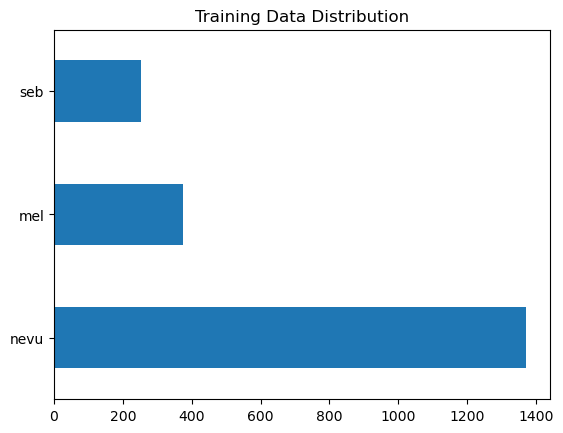

In [36]:
df_train["id"].value_counts().plot(kind="barh", title="Training Data Distribution")

<AxesSubplot:title={'center':'Test Data Distribution'}>

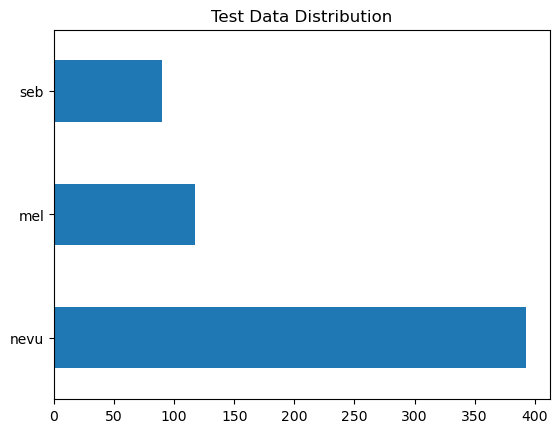

In [37]:
df_test["id"].value_counts().plot(kind="barh", title="Test Data Distribution")

<AxesSubplot:title={'center':'Val Data Distribution'}>

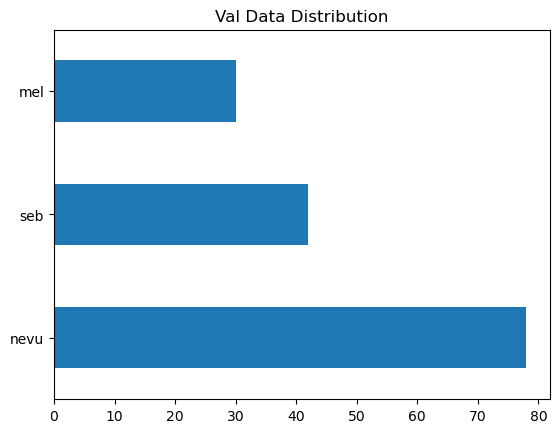

In [38]:
df_val["id"].value_counts().plot(kind="barh", title="Val Data Distribution")

In [39]:
# Set the directories for the data
data_dir = 'D:/msc/data/'

# Set the directories for the split datasets
train_splited_dir = os.path.join(data_dir, 'train_splited')
test_splited_dir = os.path.join(data_dir, 'test_splited')
val_splited_dir = os.path.join(data_dir, 'val_splited')

In [53]:
# Define a function to split a dataset based on the ground truth 'id' values
def split_dataset(dataset_dir, ground_truth, splited_dir):
    # Create new directories for each 'id' value
    mel_dir = os.path.join(splited_dir, 'mel')
    seb_dir = os.path.join(splited_dir, 'seb')
    nevu_dir = os.path.join(splited_dir, 'nevu')
    os.makedirs(mel_dir, exist_ok=True)
    os.makedirs(seb_dir, exist_ok=True)
    os.makedirs(nevu_dir, exist_ok=True)
    
    # Loop over each row in the ground truth data
    for index, row in ground_truth.iterrows():
        # Get the image ID and 'id' value for this row
        image_id = row.iloc[0]
        image_type = row['id']
        
        # Set the destination directory based on the 'id' value
        if image_type == 'mel':
            dst_dir = mel_dir
        elif image_type == 'seb':
            dst_dir = seb_dir
        else:
            dst_dir = nevu_dir
        
        # Copy the image file from the dataset directory to the destination directory
        src_file = os.path.join(dataset_dir, f'{image_id}.jpg')
        dst_file = os.path.join(dst_dir, f'{image_id}.jpg')
        shutil.copy(src_file, dst_file)
        
    # Print a completion message
    print(f'Done splitting dataset in {dataset_dir}!')    

In [ ]:
# Split the train, test, and validation datasets based on the ground truth 'id' values
split_dataset(train_dir, df_train, train_splited_dir)
split_dataset(test_dir, df_test, test_splited_dir)
split_dataset(val_dir, df_val, val_splited_dir)